In [1]:
import feature_engine.encoding
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import pandas
import pycaret.classification as classification
import sklearn.preprocessing

In [2]:
train_df = pandas.read_csv("train.csv")
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [3]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
train_X_df = train_df.drop(columns=["NObeyesdad"])
train_X_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [5]:
train_y_df = train_df[["NObeyesdad"]]
train_y_df

,NObeyesdad
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II
...,...
20753,Obesity_Type_II
20754,Insufficient_Weight
20755,Obesity_Type_II
20756,Overweight_Level_II


In [6]:
pipeline = feature_engine.pipeline.make_pipeline(
    feature_engine.selection.DropFeatures(features_to_drop=["id"]),   
    feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler(), variables=["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]),
    feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary', variables=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]),
)

In [7]:
train_X_transformed_df = pipeline.fit_transform(train_X_df)
train_X_transformed_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,0.222192,0.475586,0.338497,0,0,0.500000,0.661099,0,0,0.881787,0,0.000000,0.488237,0,0
1,1,0.085106,0.209260,0.142792,0,0,0.500000,0.666667,1,0,0.500000,0,0.333333,0.500000,1,1
2,1,0.085106,0.497391,0.088577,0,0,0.440267,0.137228,0,0,0.455189,0,0.288682,0.836792,1,0
3,1,0.147931,0.496002,0.732007,0,0,1.000000,0.666667,0,0,0.337031,0,0.489288,0.390099,0,0
4,0,0.375342,0.883049,0.434708,0,0,0.839832,0.323824,0,0,0.489924,0,0.655991,0.465861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,0.236959,0.602336,0.596452,0,0,0.959792,0.666667,0,0,0.575905,0,0.443506,0.098340,0,0
20754,0,0.085106,0.494613,0.087262,1,0,1.000000,1.000000,1,0,0.000000,0,0.666667,0.500000,0,0
20755,0,0.129809,0.703030,0.528177,0,0,0.703909,0.666667,0,0,0.500000,0,0.386013,0.599220,1,0
20756,0,0.422403,0.475590,0.353174,0,0,0.835619,0.323824,0,0,0.572419,0,0.000000,0.486917,1,1


In [8]:
target_encoder = feature_engine.encoding.OrdinalEncoder(encoding_method="arbitrary", variables=["NObeyesdad"])
train_y_transformed_df = target_encoder.fit_transform(train_y_df)
train_y_transformed_df

,NObeyesdad
0,0
1,1
2,2
3,3
4,0
...,...
20753,4
20754,2
20755,4
20756,0


In [9]:
train_transformed_df = train_X_transformed_df.join(train_y_transformed_df)
train_transformed_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.222192,0.475586,0.338497,0,0,0.500000,0.661099,0,0,0.881787,0,0.000000,0.488237,0,0,0
1,1,0.085106,0.209260,0.142792,0,0,0.500000,0.666667,1,0,0.500000,0,0.333333,0.500000,1,1,1
2,1,0.085106,0.497391,0.088577,0,0,0.440267,0.137228,0,0,0.455189,0,0.288682,0.836792,1,0,2
3,1,0.147931,0.496002,0.732007,0,0,1.000000,0.666667,0,0,0.337031,0,0.489288,0.390099,0,0,3
4,0,0.375342,0.883049,0.434708,0,0,0.839832,0.323824,0,0,0.489924,0,0.655991,0.465861,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,0.236959,0.602336,0.596452,0,0,0.959792,0.666667,0,0,0.575905,0,0.443506,0.098340,0,0,4
20754,0,0.085106,0.494613,0.087262,1,0,1.000000,1.000000,1,0,0.000000,0,0.666667,0.500000,0,0,2
20755,0,0.129809,0.703030,0.528177,0,0,0.703909,0.666667,0,0,0.500000,0,0.386013,0.599220,1,0,4
20756,0,0.422403,0.475590,0.353174,0,0,0.835619,0.323824,0,0,0.572419,0,0.000000,0.486917,1,1,0


In [10]:
classification.setup(train_transformed_df, target="NObeyesdad")

,Description,Value
0,Session id,5885
1,Target,NObeyesdad
2,Target type,Multiclass
3,Original data shape,"(20758, 17)"
4,Transformed data shape,"(20758, 17)"
5,Transformed train set shape,"(14530, 17)"
6,Transformed test set shape,"(6228, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [11]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9008,0.9896,0.9008,0.9008,0.9005,0.8836,0.8837,0.6270
gbc,Gradient Boosting Classifier,0.8996,0.0000,0.8996,0.8998,0.8993,0.8822,0.8823,1.4120
rf,Random Forest Classifier,0.8921,0.9876,0.8921,0.8921,0.8916,0.8734,0.8736,0.2150
et,Extra Trees Classifier,0.8757,0.9839,0.8757,0.8756,0.8750,0.8542,0.8544,0.1690
dt,Decision Tree Classifier,0.8410,0.9085,0.8410,0.8415,0.8410,0.8135,0.8136,0.0160
lda,Linear Discriminant Analysis,0.8210,0.0000,0.8210,0.8203,0.8197,0.7901,0.7904,0.0100
lr,Logistic Regression,0.8042,0.0000,0.8042,0.7975,0.7990,0.7701,0.7707,0.5230
knn,K Neighbors Classifier,0.7085,0.9081,0.7085,0.7109,0.7061,0.6577,0.6590,0.2580
svm,SVM - Linear Kernel,0.6819,0.0000,0.6819,0.6753,0.6500,0.6264,0.6340,0.0320
nb,Naive Bayes,0.6505,0.9259,0.6505,0.6515,0.6269,0.5885,0.5963,0.0110


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5885, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [12]:
my_model = classification.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8906,0.9888,0.8906,0.8906,0.8903,0.8716,0.8717
1,0.8968,0.9902,0.8968,0.8977,0.8965,0.8789,0.8791
2,0.8968,0.9881,0.8968,0.8958,0.8962,0.8789,0.8789
3,0.9085,0.9895,0.9085,0.9083,0.9078,0.8926,0.8928
4,0.9078,0.9902,0.9078,0.9071,0.9071,0.8918,0.8919
5,0.8988,0.9895,0.8988,0.8981,0.8981,0.8813,0.8814
6,0.9043,0.9907,0.9043,0.9045,0.9042,0.8878,0.8878
7,0.9147,0.9911,0.9147,0.9149,0.9146,0.8999,0.8999
8,0.8954,0.9889,0.8954,0.8955,0.8953,0.8773,0.8773


In [13]:
tuned_model = classification.tune_model(my_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8995,0.9898,0.8995,0.8992,0.8991,0.8821,0.8822
1,0.8954,0.9894,0.8954,0.8964,0.8957,0.8773,0.8774
2,0.9002,0.9893,0.9002,0.9005,0.9000,0.8829,0.8831
3,0.9030,0.9906,0.9030,0.9035,0.9025,0.8862,0.8864
4,0.9112,0.9901,0.9112,0.9106,0.9106,0.8958,0.8959
5,0.9057,0.9902,0.9057,0.9046,0.9050,0.8894,0.8894
6,0.9057,0.9906,0.9057,0.9059,0.9056,0.8894,0.8894
7,0.9064,0.9911,0.9064,0.9066,0.9063,0.8902,0.8903
8,0.8995,0.9900,0.8995,0.9002,0.8997,0.8822,0.8822


Fitting 10 folds for each of 10 candidates, totalling 100 fits


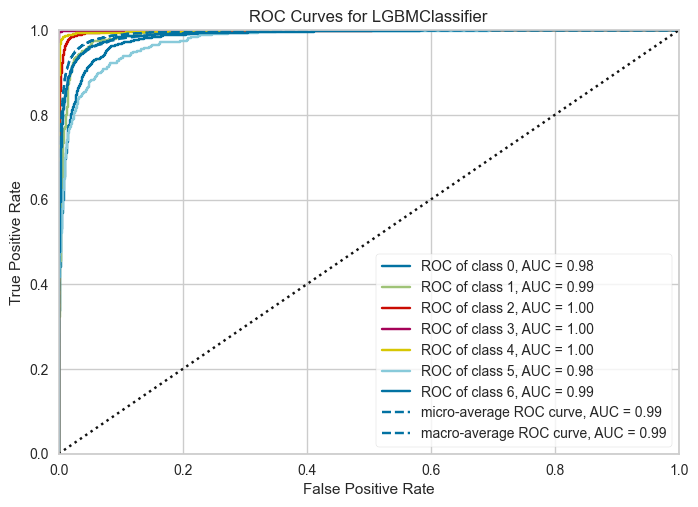

In [14]:
classification.plot_model(tuned_model)

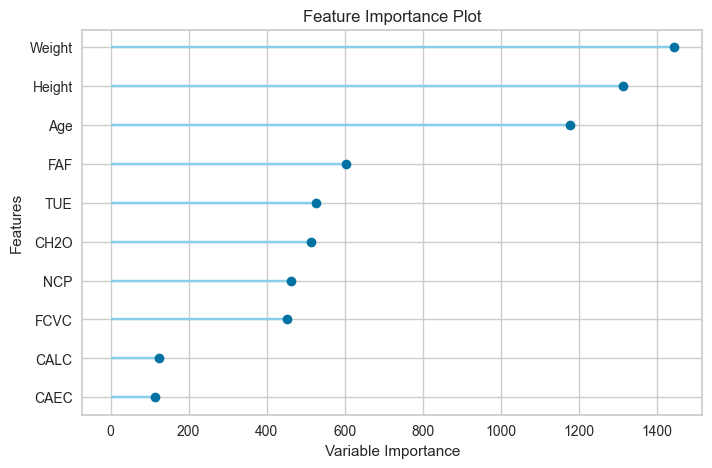

In [15]:
classification.plot_model(tuned_model, plot="feature")

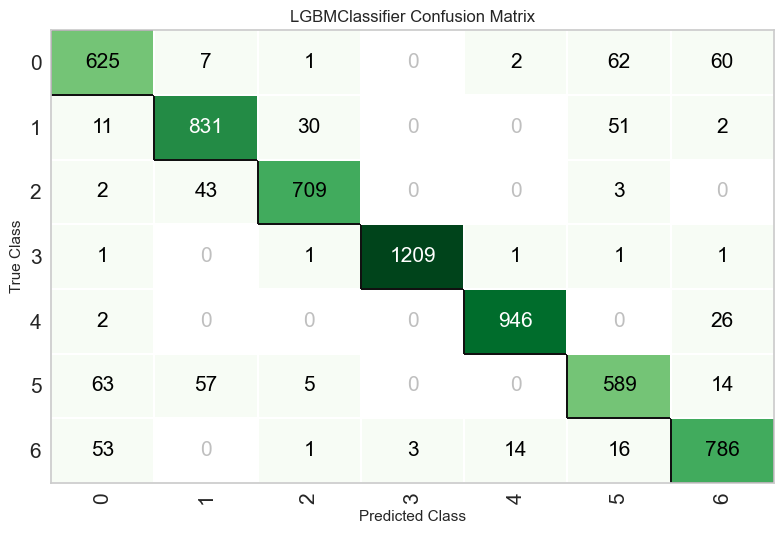

In [16]:
classification.plot_model(tuned_model, plot="confusion_matrix")

In [17]:
final_model = classification.finalize_model(tuned_model)

In [18]:
test_df = pandas.read_csv("test.csv")
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [19]:
test_transformed_df = pipeline.transform(test_df)
test_transformed_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,0.274466,0.757698,0.647675,0,0,0.969308,0.666667,0,0,0.912815,0,0.285133,0.000000,0.0,0
1,1,0.148936,0.285354,0.214188,0,0,0.500000,0.000000,0,0,1.000000,0,0.333333,0.000000,0.0,0
2,1,0.255319,0.367831,0.575933,0,0,1.000000,0.666667,0,0,0.810939,0,0.000000,0.125251,0.0,0
3,0,0.148495,0.196185,0.513014,0,0,0.500000,0.659303,0,0,0.893209,0,0.031617,0.000000,0.0,0
4,1,0.255319,0.337471,0.522265,0,0,1.000000,0.666667,0,0,0.826766,0,0.000000,0.370534,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,0.198465,0.516270,0.309624,0,1,0.906617,0.666667,0,0,0.000000,0,0.269025,0.389316,0.0,0
13836,1,0.319149,0.266330,0.182457,1,0,1.000000,0.666667,0,0,0.500000,0,0.000000,0.000000,0.0,0
13837,1,0.190119,0.257859,0.042652,1,0,1.000000,0.424580,1,0,0.500000,0,0.649947,0.500000,0.0,0
13838,0,0.148936,0.323401,0.111061,0,0,0.500000,0.666667,0,0,0.500000,0,1.000000,1.000000,1.0,0


In [20]:
predicted_df = classification.predict_model(final_model, test_transformed_df)
predicted_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,0,0.274466,0.757698,0.647675,0,0,0.969308,0.666667,0,0,0.912814,0,0.285133,0.000000,0.0,0,4,0.9991
1,1,0.148936,0.285354,0.214188,0,0,0.500000,0.000000,0,0,1.000000,0,0.333333,0.000000,0.0,0,5,0.9671
2,1,0.255319,0.367831,0.575933,0,0,1.000000,0.666667,0,0,0.810938,0,0.000000,0.125251,0.0,0,3,0.9995
3,0,0.148495,0.196185,0.513014,0,0,0.500000,0.659303,0,0,0.893209,0,0.031617,0.000000,0.0,0,6,0.9961
4,1,0.255319,0.337471,0.522265,0,0,1.000000,0.666667,0,0,0.826765,0,0.000000,0.370535,0.0,0,3,0.9932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,0.198465,0.516270,0.309624,0,1,0.906617,0.666667,0,0,0.000000,0,0.269025,0.389316,0.0,0,0,0.9739
13836,1,0.319149,0.266330,0.182457,1,0,1.000000,0.666667,0,0,0.500000,0,0.000000,0.000000,0.0,0,1,0.6694
13837,1,0.190119,0.257859,0.042652,1,0,1.000000,0.424580,1,0,0.500000,0,0.649947,0.500000,0.0,0,2,0.9983
13838,0,0.148936,0.323401,0.111061,0,0,0.500000,0.666667,0,0,0.500000,0,1.000000,1.000000,1.0,0,1,0.7480


In [22]:
tmp_df = predicted_df[["prediction_label"]]
tmp_df.columns = ["NObeyesdad"]
predicted_inversed_df = target_encoder.inverse_transform(tmp_df)
predicted_inversed_df

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III
...,...
13835,Overweight_Level_II
13836,Normal_Weight
13837,Insufficient_Weight
13838,Normal_Weight


In [25]:
submit_df = test_df[["id"]]
submit_df = submit_df.join(predicted_inversed_df)
submit_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [26]:
submit_df.to_csv("submit.csv", index=False)